In [83]:
# For notebook plotting
%matplotlib inline

# Import dependencies
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data_root = '../data/'
train_path = 'train_V2.csv'
test_path = 'test_V2.csv'

In [85]:
train_data = pd.read_csv(os.path.join(data_root, train_path))
# test_data = pd.read_csv(os.path.join(data_root, test_path))

## Data Processing

### EDA first

In [86]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [98]:
# plt functions

def show_count_plt(df, column_name):
    plt.figure(figsize=(15,4))
    sns.countplot(data=df, x=column_name).set_title(column_name)
    plt.show()
    
def show_dist_plt(df, column_name):
    plt.figure(figsize=(15, 4))
    sns.distplot(df[column_name], bins=50, rug=True)
    plt.show()

In [88]:
# train_data.drop([2744604], axis=0)
train_data['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [89]:
# rm wtf modes, only focus on stadard modes for now
std_modes = ['squad-fpp', 'duo-fpp', 'solo-fpp', 'squad', 'duo', 'solo']
train_std = train_data.loc[train_data['matchType'].isin(std_modes)]

In [90]:
# new_data = train_data.groupby(['matchId', 'groupId'])

# Is it needed to count cheaters into total player number
train_std['player_joined'] = train_std.groupby('matchId')['matchId'].transform('count')
train_std['group_members'] = train_std.groupby(['groupId', 'matchId'])['groupId'].transform('count')
# train_std['group_joined'] = train_std.groupby('matchId')['matchId'].transform('count')

train_std['total_distance'] = train_std['walkDistance'] + train_std['swimDistance'] + train_std['rideDistance']

train_std['avg_max_walk_speed'] = train_std['walkDistance'] / train_std['matchDuration']

train_std['total_med_items'] = train_std['boosts'] + train_std['heals']

train_std['headshot_rate'] = train_std['headshotKills'] / train_std['kills']
train_std['headshot_rate'] = train_std['headshot_rate'].fillna(0)
# show_dist_plt(train_std, 'headshot_rate')

train_std['damage_per_enermy'] = train_std['damageDealt'] / (train_std['kills'] + train_std['assists'])

# train_data.fillna({'headshot_rate': 0})

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

#### Kills

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


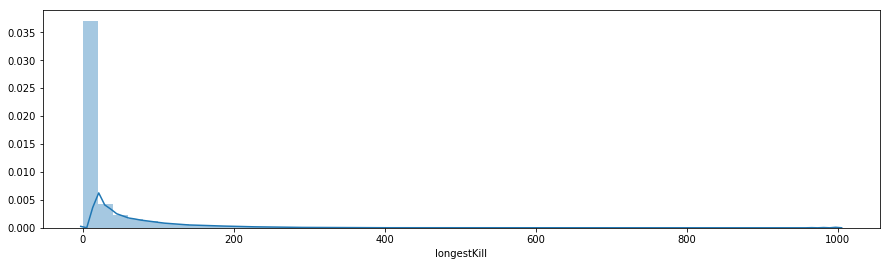

In [9]:
show_dist_plt(train_std, 'longestKill')

(0, 100]        1579222
(100, 200]       228177
(200, 300]        61918
(300, 400]        14517
(400, 500]         3434
(500, 600]          984
(600, 700]          339
(700, 800]          169
(800, 900]          111
(900, 1000]         103
(1000, 2000]          2
Name: longestKill, dtype: int64
242.8


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


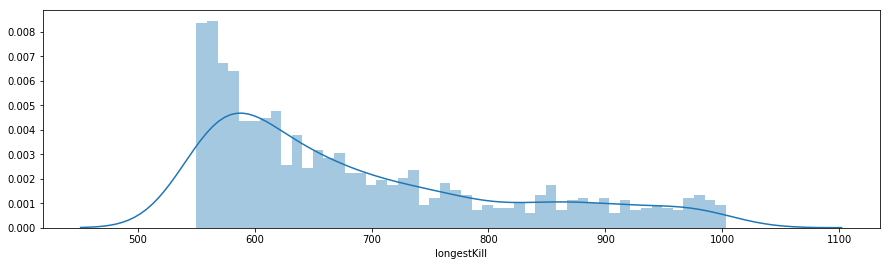

In [10]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]
print(pd.cut(train_std['longestKill'], bins).value_counts())
print(train_std['longestKill'].quantile(0.99))
show_dist_plt(train_std[train_std['longestKill']>550], 'longestKill')

In [50]:
train_std[train_std['total_distance']==0]['kills'].value_counts()
# train_std[train_std['total_distance']==0][['kills', 'weaponsAcquired']].describe()

0    95176
1      216
2        6
Name: kills, dtype: int64

In [ ]:
train_std.query('total_distance')

In [9]:
print(train_std['teamKills'].value_counts())
# when I got crazy, I can even kill my self
train_std[train_std['teamKills']==4]['vehicleDestroys'].value_counts()
# 安全驾驶，警钟长鸣

0    4316340
1      87372
2       7121
3        795
4         71
Name: teamKills, dtype: int64


1    39
0    32
Name: vehicleDestroys, dtype: int64

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


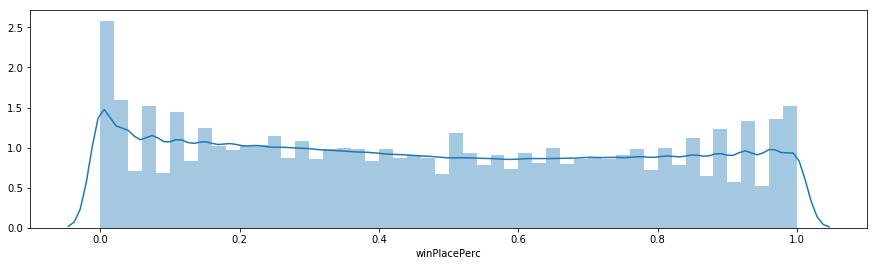

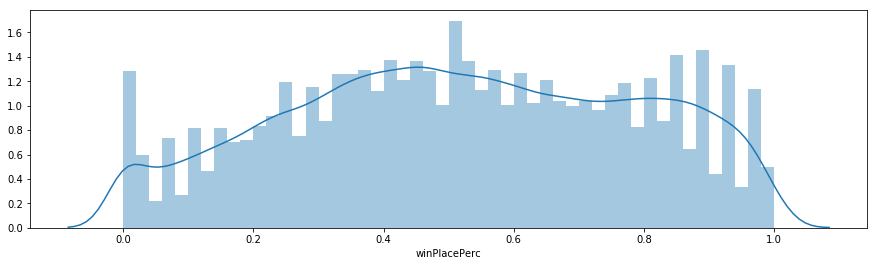

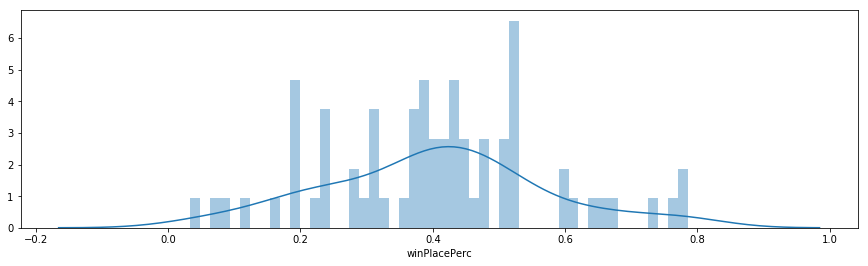

In [13]:
show_dist_plt(train_std[train_std['teamKills']==0], 'winPlacePerc')
show_dist_plt(train_std[train_std['teamKills'].isin([1,2,3])], 'winPlacePerc')
show_dist_plt(train_std[train_std['teamKills']==4], 'winPlacePerc')

0     4400059
1       10426
2         994
3         146
4          32
5          13
6           8
8           7
7           7
11          2
9           2
18          1
14          1
10          1
Name: roadKills, dtype: int64
2.0


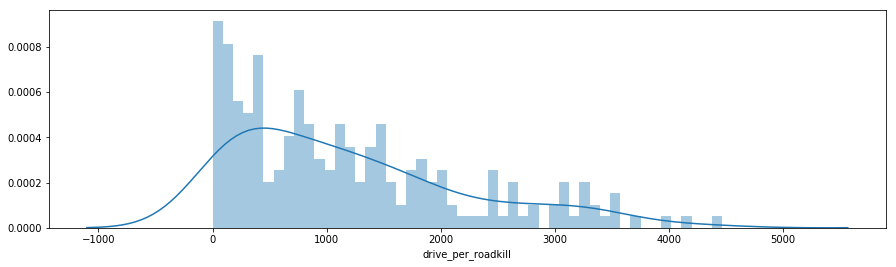

In [14]:
print(train_std['roadKills'].value_counts())
print(train_std['roadKills'].quantile(0.9999))
df_temp = train_std[train_std['roadKills'] > 2].copy()
df_temp['drive_per_roadkill'] = df_temp['rideDistance'] / df_temp['roadKills']
show_dist_plt(df_temp, 'drive_per_roadkill')
# train_std[train_std['roadKills']==18][['kills', 'rideDistance']]

In [40]:
print(train_std['killStreaks'].value_counts())
print(train_std['killStreaks'].describe())
# show_dist_plt(column_name='killStreaks', df=train_std.query)
train_std['killStreaks'].describe()
train_std['killStreaks'].quantile(0.99999)

0     2513808
1     1463294
2      383989
3       44666
4        5406
5         342
6          95
7          40
8          23
9          11
10          7
11          5
12          5
13          5
16          1
14          1
18          1
Name: killStreaks, dtype: int64
count    4.411699e+06
mean     5.417493e-01
std      7.082327e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.800000e+01
Name: killStreaks, dtype: float64


8.0

In [81]:
train_std['avg_max_walk_speed'].describe()

count    4.411699e+06
mean     7.316154e-01
std      7.459453e-01
min      0.000000e+00
25%      1.009664e-01
50%      4.294283e-01
75%      1.253566e+00
max      1.364743e+01
Name: avg_max_walk_speed, dtype: float64

         weaponsAcquired  kills  total_distance  headshot_rate  winPlacePerc
72720                  2     11       1608.4520       0.363636        0.4384
124986                 8     14        901.7000       0.285714        0.5342
181408                 3     11       4958.5600       0.636364        1.0000
652889                 5     16       3110.0000       0.687500        1.0000
669149                 5     16       3329.2000       0.937500        1.0000
717108                 7     11       8950.0000       0.363636        1.0000
999741                 2     15       1074.0000       0.600000        0.6477
1204938                4     15       6002.7000       0.733333        0.9200
1234087                3     13       3546.0000       0.384615        0.8077
1414822                4     14       3296.0000       0.857143        1.0000
1548132                4     12       2954.0000       0.166667        1.0000
1743111                7     13       5570.0000       0.461538        1.0000

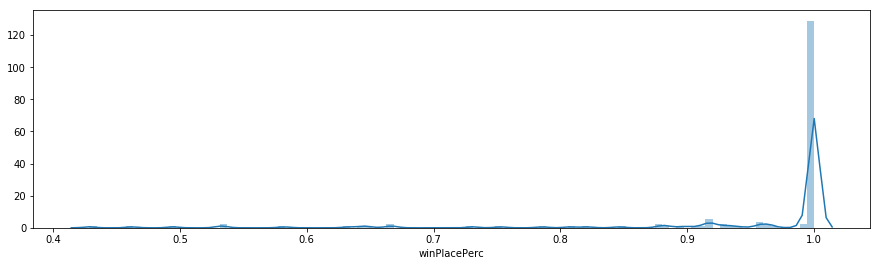

count    38.000000
mean      0.806455
std       0.230606
min       0.352900
25%       0.568200
50%       0.960000
75%       1.000000
max       1.000000
Name: winPlacePerc, dtype: float64

In [72]:
print(train_std.query('heals == 0 and boosts == 0 and kills > 10')[['weaponsAcquired', 'kills','total_distance', 'headshot_rate', 'winPlacePerc']])
show_dist_plt(column_name='winPlacePerc', df=train_std.query('heals == 0 and kills > 12'))
train_std.query('heals == 0 and boosts == 0 and kills > 10')['winPlacePerc'].describe()

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


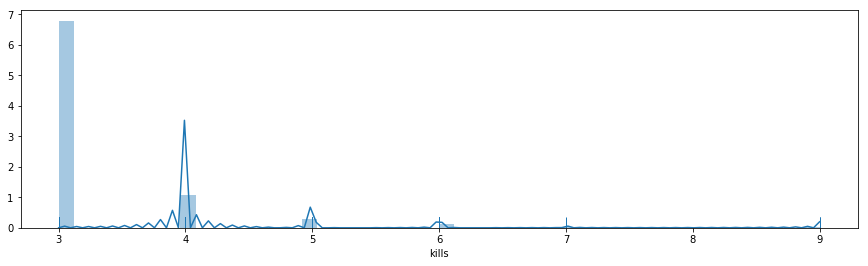

In [99]:
show_dist_plt(df=train_std.query('headshot_rate == 1 and kills > 2')[(train_std['damageDealt'] / train_std['kills']) % 100 == 0], column_name='kills')

In [58]:
# train_std.query('winPlacePerc == 1 and heals == 0 and boosts == 0')['total_distance'].describe()

count     6537.000000
mean      2056.622979
std       2147.232900
min          0.000000
25%        169.600000
50%       1738.000000
75%       3159.000000
max      24205.800000
Name: total_distance, dtype: float64

In [17]:
bins = [-1, 0, 1, 3, 10, 20, 30, 50]
print(pd.cut(train_std['kills'], bins).value_counts())
print(train_std['kills'].describe())
train_std['kills'].quantile(0.9999)

(-1, 0]     2513808
(0, 1]       922033
(1, 3]       699345
(3, 10]      270401
(10, 20]       6074
(20, 30]         37
(30, 50]          1
Name: kills, dtype: int64
count    4.411699e+06
mean     9.116071e-01
std      1.501082e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.300000e+01
Name: kills, dtype: float64


16.0

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


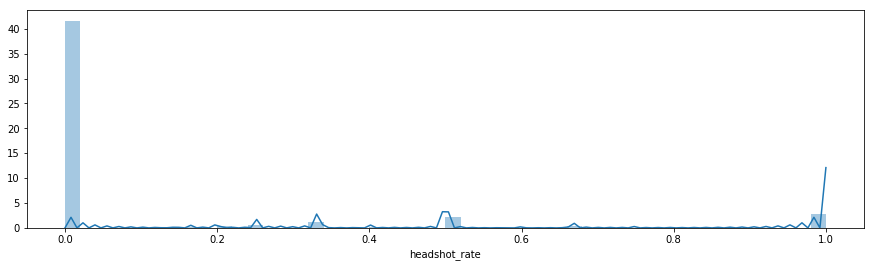

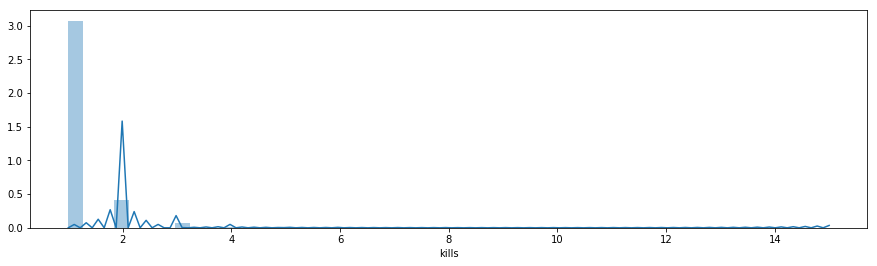

In [18]:
show_dist_plt(train_std, 'headshot_rate')
show_dist_plt(train_std[train_std['headshot_rate']==1], 'kills')

In [19]:
print(train_std[train_std['headshot_rate']==1]['kills'].value_counts())
print('kill threshold', train_std[train_std['headshot_rate']==1]['kills'].quantile(0.9999))
df_temp = train_std[train_std['headshot_rate']==1].copy()
print(df_temp[((df_temp['damageDealt'] / df_temp['kills']) % 100 == 0) & (train_std['headshot_rate']==1)]['kills'].value_counts())
print(df_temp[((df_temp['damageDealt'] / df_temp['kills']) % 100 < 1) & (train_std['headshot_rate']==1)]['kills'].value_counts())
print('damage/kill threshold', df_temp[(df_temp['damageDealt'] / df_temp['kills']) % 100 == 0]['kills'].quantile(0.999))

1     217323
2      29291
3       4590
4        983
5        236
6         80
7         37
8         26
9         13
10        11
11         5
15         2
14         2
13         2
12         2
Name: kills, dtype: int64
kill threshold 9.0


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


1    52952
2     3505
3      325
4       51
5       14
6        6
9        2
7        1
Name: kills, dtype: int64
1     54071
2      3732
3       377
4        65
5        16
6         6
9         2
7         2
15        1
Name: kills, dtype: int64
damage/kill threshold 4.0


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


#### Weapons

In [20]:
bins = [5, 10, 20, 30, 40, 60, 80, 100, 200, 400]
print(pd.cut(train_std['weaponsAcquired'], bins).value_counts())
print(train_std['weaponsAcquired'].describe())
train_std[train_std['weaponsAcquired'] > 80][['kills', 'damageDealt', 'total_distance', 'weaponsAcquired']]

(5, 10]       821796
(10, 20]       35677
(20, 30]         181
(30, 40]          28
(40, 60]          19
(60, 80]           9
(80, 100]          7
(100, 200]         5
(200, 400]         1
Name: weaponsAcquired, dtype: int64
count    4.411699e+06
mean     3.630741e+00
std      2.322627e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      2.360000e+02
Name: weaponsAcquired, dtype: float64


,kills,damageDealt,total_distance,weaponsAcquired
233643,0,67.11,3187.00,128
1437471,1,100.00,5299.21,102
1449293,0,0.00,653.10,95
1834515,0,26.46,2835.00,96
2442962,0,0.00,807.60,95
2743408,2,186.90,3318.00,167
2749693,3,378.90,3641.70,177
2797867,0,0.00,1235.00,153
2973445,5,371.30,2509.40,87
2977084,4,683.60,3534.60,85


In [21]:
df_temp = train_std['total_distance'].copy()
df_temp[df_temp == 0] = 1
rate = train_std['weaponsAcquired'] / df_temp
print(rate.describe())
print(rate.quantile(0.99))
print(rate.quantile(0.999))
print(rate.quantile(0.9999))

train_std[(train_std['weaponsAcquired'] / train_std['total_distance'] > 3) & 
          (train_std['total_distance']>0)
         ][['total_distance', 'kills', 'weaponsAcquired']].describe()

count    4.411699e+06
mean     2.299348e-02
std      6.209043e-01
min      0.000000e+00
25%      1.442793e-03
50%      3.549246e-03
75%      1.146132e-02
max      1.000000e+03
dtype: float64
0.16597510373443983
3.0
11.092431243095133


,total_distance,kills,weaponsAcquired
count,452.000000,452.000000,452.000000
mean,0.226863,0.019912,1.192478
std,0.154147,0.154896,0.524889
min,0.001000,0.000000,1.000000
25%,0.112775,0.000000,1.000000
50%,0.232450,0.000000,1.000000
75%,0.293350,0.000000,1.000000
max,1.373000,2.000000,8.000000


In [48]:
print(train_std[train_std['total_distance'] == 0]['weaponsAcquired'].describe())

count    91217.00000
mean         0.16452
std          0.42446
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          2.00000
Name: weaponsAcquired, dtype: float64
29         0.0
116        0.0
151        0.0
237        0.0
283        0.0
404        0.0
520        0.0
606        0.0
619        0.0
638        0.0
666        0.0
711        1.0
714        0.0
863        0.0
1123       0.0
1237       0.0
1261       0.0
1285       0.0
1297       0.0
1402       0.0
1407       0.0
1416       0.0
1433       1.0
1466       0.0
1475       0.0
1490       0.0
1523       0.0
1642       0.0
1647       0.0
1681       0.0
          ... 
4446099    0.0
4446157    1.0
4446175    0.0
4446255    0.0
4446292    0.0
4446312    0.0
4446340    0.0
4446347    0.0
4446397    0.0
4446409    0.0
4446411    0.0
4446427    0.0
4446448    0.0
4446464    1.0
4446544    0.0
4446551    0.0
4446574    0.0
4446585    0.0
4446592    0.0
4446618    0.0
4446650    0.0
4446743    0.0

In [23]:
bins = (-1, 0, 1, 2, 3, 5, 10, 30, 60)
pd.cut(train_std[train_std['total_distance'] == 0]['weaponsAcquired'], bins).value_counts()

(-1, 0]     78159
(0, 1]      11111
(1, 2]       1948
(3, 5]       1370
(5, 10]      1331
(2, 3]       1029
(10, 30]      439
(30, 60]       11
Name: weaponsAcquired, dtype: int64

In [24]:
# zombie_mode = train_data.loc[(train_data['weaponsAcquired']==0)&(train_data['walkDistance']>1000)&(train_data['rideDistance']==0)&(train_data['heals']==0)&(train_data['boosts']==0)]
# zombie_mode['matchType']

In [25]:
train_std.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'player_joined',
       'group_members', 'total_distance', 'avg_max_walk_speed',
       'total_med_items', 'headshot_rate', 'damage_per_enermy'],
      dtype='object')

#### Med items

In [26]:
print(train_std['heals'].describe())
print(train_std['heals'].quantile(0.9999))
bins = [-1, 0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80]
# train_std['heals'].value_counts()
pd.cut(train_std['heals'], bins).value_counts()

count    4.411699e+06
mean     1.362065e+00
std      2.669458e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      8.000000e+01
Name: heals, dtype: float64
33.0


(-1, 0]     2632580
(1, 5]       790441
(0, 1]       667755
(5, 10]      247216
(10, 20]      67901
(20, 30]       5134
(30, 40]        558
(40, 50]         95
(50, 60]         13
(60, 70]          4
(70, 80]          2
Name: heals, dtype: int64

In [27]:
train_std[train_std['heals'] > 50][['kills', 'winPlacePerc', 'total_distance', 'boosts', 'heals']]

,kills,winPlacePerc,total_distance,boosts,heals
126439,0,0.8333,1343.443,2,52
700615,0,0.6364,1626.600,3,61
807030,0,0.8617,5610.970,5,57
996709,0,0.8481,5658.000,6,63
1491736,2,0.8148,3963.000,2,55
2067819,1,0.8750,5149.000,7,59
2322626,1,0.9231,2575.500,5,52
2372719,2,1.0000,5759.000,3,54
2636846,0,0.7037,816.800,14,51
2822121,0,0.7778,6433.960,4,51


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


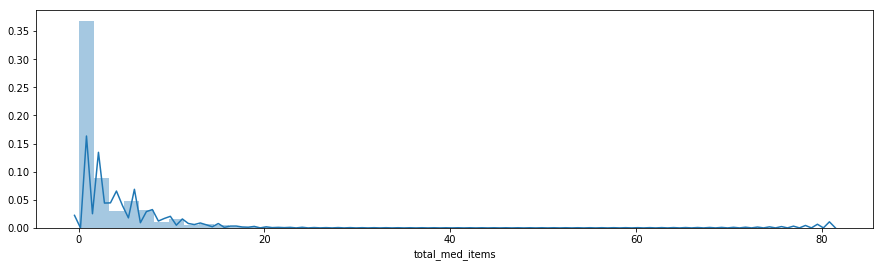

In [28]:
show_dist_plt(train_std, 'total_med_items')

       matchDuration
count   4.411699e+06
mean    1.580703e+03
std     2.544940e+02
min     9.000000e+00
25%     1.367000e+03
50%     1.438000e+03
75%     1.850000e+03
max     2.237000e+03


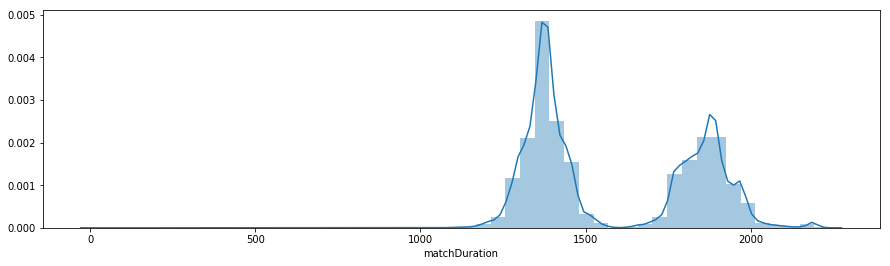

In [13]:
print(train_std[['matchDuration']].describe())
show_dist_plt(train_std.query(), 'matchDuration')

In [30]:
train_std.query('weaponsAcquired>40 and total_distance==0')[['heals', 'weaponsAcquired', 'total_distance', 'kills', 'winPlacePerc']]

,heals,weaponsAcquired,total_distance,kills,winPlacePerc
493086,0,42,0.0,0,0.0
3260247,0,41,0.0,0,1.0
3620215,0,52,0.0,0,1.0


count    10208.000000
mean      1388.477763
std        381.566332
min          0.000000
25%       1433.000000
50%       1483.000000
75%       1507.000000
max       4249.000000
Name: rankPoints, dtype: float64
count    1.294412e+06
mean     1.438166e+03
std      3.010042e+02
min      0.000000e+00
25%      1.455000e+03
50%      1.494000e+03
75%      1.514000e+03
max      5.910000e+03
Name: rankPoints, dtype: float64
count    858909.000000
mean       1452.259556
std         250.218886
min           0.000000
25%        1461.000000
50%        1494.000000
75%        1508.000000
max        3094.000000
Name: rankPoints, dtype: float64
count    17549.000000
mean       807.239159
std        744.642444
min         -1.000000
25%         -1.000000
50%       1379.000000
75%       1493.000000
max       4249.000000
Name: rankPoints, dtype: float64
count    2.241982e+06
mean     8.299048e+02
std      7.468048e+02
min     -1.000000e+00
25%     -1.000000e+00
50%      1.411000e+03
75%      1.500000e+03
ma

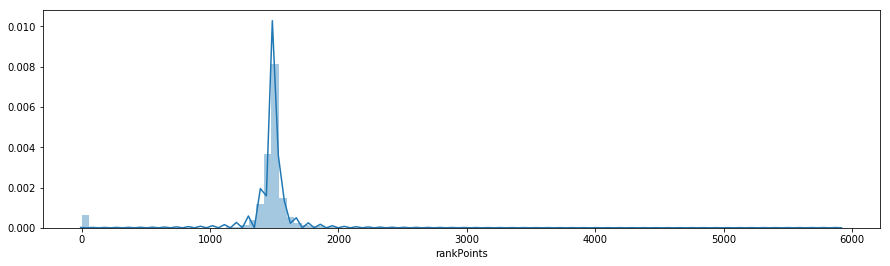

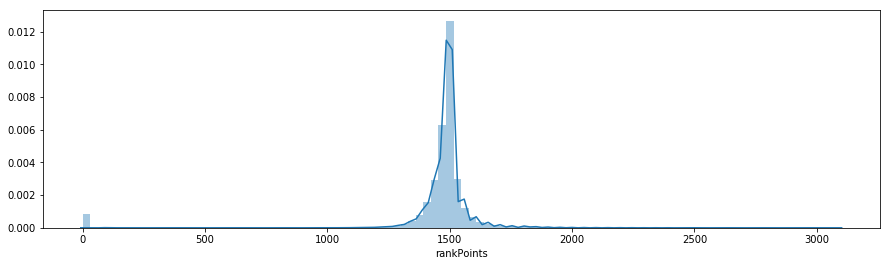

In [19]:
print(train_std.query('matchDuration<1200 and rankPoints != -1')['rankPoints'].describe())
print(train_std.query('matchDuration>1250 and matchDuration<1450 and rankPoints != -1')['rankPoints'].describe())
print(train_std.query('matchDuration>1700 and matchDuration<1900 and rankPoints != -1')['rankPoints'].describe())

print(train_std.query('matchDuration<1200')['rankPoints'].describe())
print(train_std.query('matchDuration>1250 and matchDuration<1450')['rankPoints'].describe())
print(train_std.query('matchDuration>1700 and matchDuration<1900')['rankPoints'].describe())

print(train_std.query('rankPoints == -1 and killStreaks > 8')['headshot_rate'].describe())
print(train_std.query('matchDuration>1250 and matchDuration<1450 and rankPoints != -1')['kills'].describe())
print(train_std.query('matchDuration>1700 and matchDuration<1900 and rankPoints != -1')['kills'].describe())

show_dist_plt(train_std.query('matchDuration>1250 and matchDuration<1450 and rankPoints != -1'), 'rankPoints')
show_dist_plt(train_std.query('matchDuration>1700 and matchDuration<1900 and rankPoints != -1'), 'rankPoints')

# sns.boxplot(data=train_std.query('matchDuration>1250 and matchDuration<1450 and rankPoints != -1'), y='killStreaks')

#### Others

In [38]:
train_std.query('avg_max_walk_speed > 7')[['avg_max_walk_speed', 'walkDistance', 'winPlacePerc']]

,avg_max_walk_speed,walkDistance,winPlacePerc
23026,7.098636,13530.0,0.8163
497965,13.647433,25780.0,0.9894
1051978,7.012630,12770.0,0.9615
1137979,7.041199,13160.0,0.9643
1188935,7.377140,13360.0,0.9643
1797162,8.219525,16250.0,0.6000
2078996,7.082505,14250.0,0.8000
2238900,8.408096,15370.0,0.8125
2395009,7.831263,15130.0,1.0000
2569946,7.613636,12730.0,0.7857


In [29]:
train_std[train_std['avg_max_walk_speed'] > 5]['avg_max_walk_speed'].describe()

count    489.000000
mean       5.629437
std        0.690324
min        5.003268
25%        5.183011
50%        5.411765
75%        5.894001
max       13.647433
Name: avg_max_walk_speed, dtype: float64

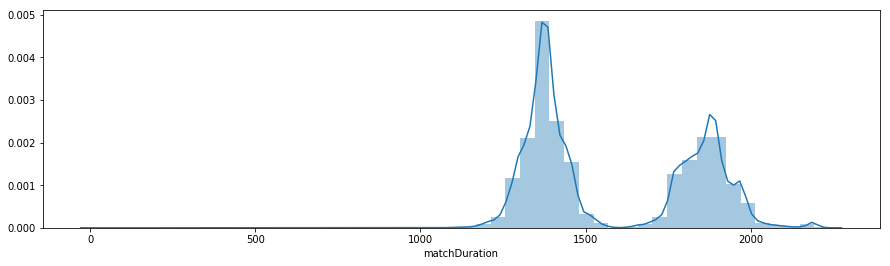

count    78903.000000
mean         0.880904
std          1.542623
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         22.000000
Name: kills, dtype: float64
count    78903.000000
mean         0.522971
std          0.718637
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: killStreaks, dtype: float64
count    4.411698e+06
mean     1.580703e+03
std      2.544929e+02
min      7.280000e+02
25%      1.367000e+03
50%      1.438000e+03
75%      1.850000e+03
max      2.237000e+03
Name: matchDuration, dtype: float64


In [30]:
show_dist_plt(train_std, 'matchDuration')
print(train_std[(train_std['matchDuration'] <= 1750) & (train_std['matchDuration'] > 1650)]['kills'].describe())
print(train_std[(train_std['matchDuration'] <= 1750) & (train_std['matchDuration'] > 1650)]['killStreaks'].describe())
print(train_std[(train_std['matchDuration'] > 10)]['matchDuration'].describe())

In [31]:
train_std['vehicleDestroys'].value_counts()

0    4379084
1      31421
2       1105
3         81
4          6
5          2
Name: vehicleDestroys, dtype: int64

In [32]:
train_std.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'player_joined',
       'group_members', 'total_distance', 'avg_max_walk_speed',
       'total_med_items', 'headshot_rate', 'damage_per_enermy'],
      dtype='object')

In [33]:
train_std.corr()['winPlacePerc'].sort_values()

killPlace            -0.720910
group_members        -0.297230
matchDuration        -0.004197
damage_per_enermy     0.002622
winPoints             0.007000
killPoints            0.013001
rankPoints            0.013751
teamKills             0.016416
player_joined         0.026233
roadKills             0.031816
maxPlace              0.038446
numGroups             0.040720
vehicleDestroys       0.072860
swimDistance          0.150905
headshot_rate         0.181161
revives               0.241897
headshotKills         0.282640
DBNOs                 0.284162
assists               0.305667
rideDistance          0.345415
killStreaks           0.377973
longestKill           0.412435
heals                 0.430058
kills                 0.431588
damageDealt           0.450645
total_med_items       0.578390
weaponsAcquired       0.617926
boosts                0.636463
total_distance        0.681970
walkDistance          0.814679
avg_max_walk_speed    0.829219
winPlacePerc          1.000000
Name: wi

In [34]:
train_std[train_std['group_members'] > 4]['groupId'].describe()

count             726082
unique            114329
top       b8275198faa03b
freq                  72
Name: groupId, dtype: object

In [35]:
train_std['matchType'].value_counts()

squad-fpp    1756186
duo-fpp       996691
squad         626526
solo-fpp      536762
duo           313591
solo          181943
Name: matchType, dtype: int64

### Outliers, cheaters & illegal data cleaning 

In [36]:
# a. Cheat_1: Total distance (riding + swimming + walk) < 0 & kills > 0
#     it seems ok
# c. Cheat_3: Head shot rate = 1 & kills > 9
#     *  Head shot rate = 1 & kills > 9 & (damage / kills) * 100 = 0
#     *  
# b. Cheat_2: Road Kills > 10
#    this seems normal

# d. Cheat_4: longest kill > 1000
#     this seems reasonable

# e. Cheat_5: weapons > 80
#     total_dis = 0 & w > 2
#    Focus on '# weapons' & '# weapons / dis'

# f. Cheat_6: heal > 40
#     reasonable, contains med kit & bandages

# g. Cheat_7: avg_walk_speed > 6 (= walkDistance / matchDuration)
#     stadard speed 6.2 

In [37]:
# useful_cols = ['kills', 'assists', 'DBNOs', 'killStreaks',
#                'headshotKills', 'longestKill', 'damageDealt', 'headshot_rate', 'killPlace',
#                'boosts', 'heals', 'revives',
#                'matchType', 'teamKills', 'vehicleDestroys',  # cut bins & one hot
#                'walkDistance', 'rideDistance', 'swimDistance',  
#                'weaponsAcquired', 'avg_max_walk_speed',
#                'numGroups', 'player_joined', 
#                'winPlacePerc',
#                'total_distance']  # not include

# train_set = train_std[useful_cols]

# normalized feature: 'kills',  'assists', 'DBNOs', 'killStreaks',
# cut bins & one hot: 'matchType', 'teamKills', 'vehicleDestroys',

In [38]:
train_std[train_std['winPlacePerc'].isnull()].index

Int64Index([2744604], dtype='int64')

In [39]:
# invalid win place
# train_set[train_set['winPlacePerc'].isnull()][['matchType', 'winPlacePerc']]
train_std.drop(train_std[train_std['winPlacePerc'].isnull()].index, inplace=True)

# kill cheater
train_std.drop(train_std[(train_std['headshot_rate']==1)&
                         (((train_std['damageDealt'] / train_std['kills']) % 100 == 0))&
                         (train_std['kills'] > 4)].index,
              inplace=True)
train_std.drop(train_std[train_std['killStreaks'] > 8].index, inplace=True)

# weapons cheater
train_std.drop(train_std[(train_std['total_distance']==0)&(train_std['weaponsAcquired']>2)].index, inplace=True)

# speed cheater
train_std.drop(train_std[train_std['avg_max_walk_speed']>6.2].index, inplace=True)


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Feature Engeering

In [40]:

from sklearn.preprocessing import Normalizer, MinMaxScaler, OneHotEncoder


In [41]:
# cut bins to categorize features
# normalization and standarization keep effects on match but not on training

ohe = OneHotEncoder()

maps = {
    'squad': 2,
    'duo': 1,
    'solo': 0
}
temp_df = pd.DataFrame()
temp_df['type'] = train_std['matchType'].map(lambda x : maps[x.split('-')[0]]) 
temp_df['aspect'] = train_std['matchType'].map(lambda x : len(x.split('-'))-1)
types = ohe.fit_transform(temp_df.type.values.reshape(-1,1)).toarray()
temp = pd.concat([pd.DataFrame(types, columns=['matchType_1', 'matchType_2', 'matchType_4']), temp_df['aspect']], axis=1)
train_std = pd.concat([train_std, temp], axis=1)

del temp_df, types, temp

In [42]:
train_std.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,group_members,total_distance,avg_max_walk_speed,total_med_items,headshot_rate,damage_per_enermy,matchType_1,matchType_2,matchType_4,aspect
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,4.0,244.8000,0.187443,0.0,0.0,NaN,0.0,0.0,1.0,1.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,4.0,1445.0445,0.806978,0.0,0.0,inf,0.0,0.0,1.0,1.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,2.0,161.8000,0.122762,0.0,0.0,68.000000,0.0,1.0,0.0,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,1.0,202.7000,0.141156,0.0,0.0,inf,0.0,0.0,1.0,1.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,1.0,49.7500,0.034937,0.0,0.0,100.000000,1.0,0.0,0.0,1.0


## Modeling

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [16]:
data_file = 'group_match_data_train_non_norm.zip'
data_file = 'group_match_data_train_norm.zip'
dataset = pd.read_csv(os.path.join(data_root, data_file))

In [17]:
# dataset.corr()['winPlacePerc'].sort_values()
dataset.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,damage_per_enemy,avg_walk_speed,player_count,matchType_onehot_duo,matchType_onehot_duo-fpp,matchType_onehot_solo,matchType_onehot_solo-fpp,matchType_onehot_squad,matchType_onehot_squad-fpp,totalDistancePlace
0,809d8288457e3d,fffe92232706aa,0.500000,1.0000,1.972410,0.888889,3,0.481481,21,0,...,181.25,1.452496,3,0,0,0,0,0,1,0.543120
1,6cfbeead9e1050,fffe92232706aa,0.333333,0.5625,1.698711,0.888889,1,0.148148,6,0,...,93.82,1.794954,2,0,0,0,0,0,1,0.541508
2,bd5b4ecf8067ab,fffe92232706aa,0.333333,0.5000,0.521854,0.444444,2,0.740741,23,0,...,254.20,1.290392,3,0,0,0,0,0,1,0.771560
3,20493abb7ca1b9,fffe92232706aa,0.500000,0.2500,1.223180,0.666667,2,0.148148,38,0,...,97.72,1.320988,3,0,0,0,0,0,1,0.410593
4,1958cde581220c,fffe92232706aa,0.333333,0.7500,-0.249563,0.111111,0,0.518519,39,0,...,114.80,1.575953,3,0,0,0,0,0,1,1.000000


In [18]:
x_cols = ['kills', 'assists', 'DBNOs', 'killStreaks',
       'headshotKills', 'longestKill', 'damageDealt', 'headshot_rate', 'killPlace',
       'boosts', 'heals', 'revives',
       'teamKills', 'vehicleDestroys',  # cut bins & one hot
       'walkDistance', 'rideDistance', 'swimDistance', 'totalDistancePlace',
        'matchType_onehot_duo-fpp', 'matchType_onehot_solo', 'matchType_onehot_solo-fpp', 'matchType_onehot_squad', 'matchType_onehot_squad-fpp', 'matchType_onehot_duo',
       'weaponsAcquired', 'avg_walk_speed', ]
y_cols = ['winPlacePerc']

types = ['matchType_onehot_duo-fpp', 'matchType_onehot_solo', 'matchType_onehot_solo-fpp', 'matchType_onehot_squad', 'matchType_onehot_squad-fpp', 'matchType_onehot_duo']
for t in types:
    train_x = dataset[dataset[t]==1][x_cols]
    train_y = dataset[dataset[t]==1][y_cols]
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3)
    
    print(f'{t}:')
#     lsr= Lasso(alpha=0.1, normalize=False)
#     lsr.fit(X_train, y_train)

#     rgr= Ridge(alpha=0.01)
#     rgr.fit(X_train, y_train)
#     rfr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=300)
#     rfr.fit(X_train, y_train)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

#     print(mae(y_test, rfr.predict(X_test)))
#     print(mae(y_test, lsr.predict(X_test)))
#     print(mae(y_test, rgr.predict(X_test)))
    print(mae(y_test, lr.predict(X_test)))

matchType_onehot_duo-fpp:


/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.07280340880745083
matchType_onehot_solo:
0.06650812703492937
matchType_onehot_solo-fpp:
0.06356988233181667
matchType_onehot_squad:
0.08163414322630785
matchType_onehot_squad-fpp:
0.07562815188028552
matchType_onehot_duo:
0.07597713810634103


In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset[x_cols], dataset[y_cols], test_size=0.3)
    
# print(f'{t}:')
# lsr= Lasso(alpha=0.1, normalize=False)
# lsr.fit(X_train, y_train)

# rgr= Ridge(alpha=0.01)
# rgr.fit(X_train, y_train)

In [14]:
rfr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=300)
rfr.fit(X_train, y_train)

# lsr= Lasso(alpha=0.1, normalize=False)
# lsr.fit(X_train, y_train)

# rgr= Ridge(alpha=0.01)
# rgr.fit(X_train, y_train)

# print(mae(y_test, lsr.predict(X_test)))
# print(mae(y_test, rgr.predict(X_test)))
print(mae(y_test, rfr.predict(X_test)))

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.09472354049316675
